In [1]:
%matplotlib inline
%run ../../import_envs.py
print('probtorch:', probtorch.__version__, 
      'torch:', torch.__version__, 
      'cuda:', torch.cuda.is_available())

probtorch: 0.0+5a2c637 torch: 1.0.0 cuda: True


In [16]:
import matplotlib.pyplot as plt
## Load dataset
data_path = "../gmm_dataset_3c"
Data = torch.from_numpy(np.load(data_path + '/obs.npy')).float()

NUM_DATASETS, N, D = Data.shape
K = 3 ## number of clusters
SAMPLE_SIZE = 1
NUM_HIDDEN_LOCAL = 32

MCMC_SIZE = 100
BATCH_SIZE = 1
CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda:1')

PATH = 'ag-%dSample' % SAMPLE_SIZE
Test_Params = (NUM_DATASETS, SAMPLE_SIZE, BATCH_SIZE, CUDA, DEVICE, PATH)
Model_Params = (N, K, D, MCMC_SIZE)

In [17]:
# from local_enc import *
# from global_oneshot import *
# from global_enc import *
# from ag_ep import ELBO

# Reparameterized = False

# # initialization
# enc_z = Enc_z(K, D, NUM_HIDDEN_LOCAL, CUDA, DEVICE)
# enc_eta = Enc_eta(K, D, CUDA, DEVICE, Reparameterized)
# oneshot_eta = Oneshot_eta(K, D, CUDA, DEVICE, Reparameterized)
# if CUDA:
#     enc_z.cuda().to(DEVICE)
#     enc_eta.cuda().to(DEVICE)
#     oneshot_eta.cuda().to(DEVICE)

# models = (oneshot_eta, enc_eta, enc_z)

In [18]:
# enc_z.load_state_dict(torch.load("../weights/enc-z-%s" % PATH))
# enc_eta.load_state_dict(torch.load("../weights/enc-eta-%s" % PATH))
# oneshot_eta.load_state_dict(torch.load("../weights/oneshot-eta-%s" % PATH))

In [19]:
# DBs_eta, DBs_z, ELBOs = test(models, ELBO, Data, Model_Params, Test_Params)

In [20]:
from local_gibbs import *
from global_gibbs import *
from gibbs import *
gibbs_z = Gibbs_z(K, CUDA, DEVICE)
gibbs_eta = Gibbs_eta(K, D, CUDA, DEVICE)

models = (gibbs_eta, gibbs_z)

In [21]:
# def Gibbs(models, obs, SubTest_Params):
#     """
#     The stepwise elbo
#     """
#     (device, S, B, N, K, D, mcmc_size) = SubTest_Params
#     ELBOs = []
#     DBs_eta = []
#     DBs_z = []
#     (gibbs_eta, gibbs_z) = models
#     obs_tau, obs_mu, log_p = gibbs_eta.sample_prior(S, B)
#     q_z, p_z = gibbs_z.forward(obs, obs_tau, obs_mu, N, K, S, B)
#     state = q_z['zs'].value
#     log_p_x = Log_likelihood(obs, state, obs_tau, obs_mu, K, D, cluster_flag=False)
#     log_w = log_p_x.sum(-1) + p_z['zs'].log_prob.sum(-1) - q_z['zs'].log_prob.sum(-1)
#     ELBOs.append(log_w.mean().unsqueeze(0))
#     for m in range(mcmc_size):
#         obs_tau_prev = obs_tau
#         obs_mu_prev = obs_mu
#         q_eta, p_eta, q_nu = gibbs_eta.forward(obs, state, K, D)
#         obs_tau, obs_mu, log_w_eta_f, log_w_eta_b  = Incremental_eta_test(q_eta, p_eta, obs, state, K, D, obs_tau_prev, obs_mu_prev)
#         DB_eta, eubo_p_q_eta, log_w_eta, w_f_eta = detailed_balances_test(log_w_eta_f, log_w_eta_b)
#         state_prev = state
#         q_z, p_z = gibbs_z.forward(obs, obs_tau, obs_mu, N, K, S, B)
#         state, log_w_z_f, log_w_z_b = Incremental_z_test(q_z, p_z, obs, obs_tau, obs_mu, K, D, state_prev)
#         DB_z, eubo_p_q_z, log_w_z, w_f_z = detailed_balances_test(log_w_z_f, log_w_z_b)
#         ELBOs.append(ELBOs[-1] + (log_w_eta + log_w_z).mean().unsqueeze(0))

#         DBs_eta.append(DB_eta.unsqueeze(0))
#         DBs_z.append(DB_z.unsqueeze(0))
#     return torch.cat(DBs_eta, 0), torch.cat(DBs_z, 0), torch.cat(ELBOs, 0)


In [44]:
DBs_eta, DBs_z, ELBOs, Ratios = Test(models, Gibbs, Data, Model_Params, Test_Params)

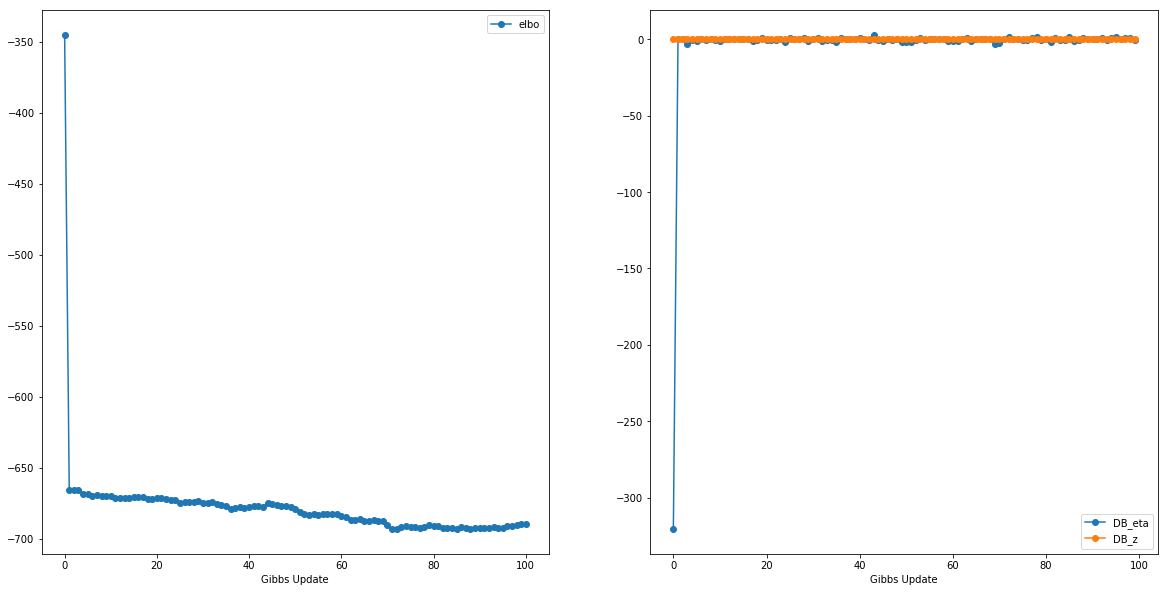

In [45]:
fs = 10
fig = plt.figure(figsize=(fs * 2, fs))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(ELBOs.cpu().data.numpy(), 'o-', label='elbo')
ax1.legend()
ax1.set_xlabel('Gibbs Update')
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(DBs_eta.cpu().data.numpy(), 'o-', label='DB_eta')
ax2.plot(DBs_z.cpu().data.numpy(), 'o-', label='DB_z')
ax2.set_xlabel('Gibbs Update')
ax2.legend()

In [10]:
Ratios

tensor([ 3.1651e+02, -8.9827e-01, -4.7271e+00, -1.9239e+00, -1.0468e+00,
        -9.2262e-01, -3.8686e-01, -1.2414e-01, -6.4924e-01, -1.4473e-01,
        -6.6592e-02, -4.9559e-01,  2.8191e-01, -6.0483e-02, -4.0748e-01,
         1.5299e-01, -3.1740e-01, -2.2764e-01, -3.7384e-01, -9.4756e-02,
        -1.0299e-01,  2.1712e-01, -4.5078e-01, -4.4383e-01, -2.9574e-01,
        -1.6206e-01, -1.6968e-01, -5.7083e-01, -8.3777e-01, -1.5220e-01,
        -1.8736e-01, -6.8054e-04, -3.1003e-01,  2.4171e-02, -1.1407e+00,
        -5.6550e-01, -6.5662e-01, -1.7660e-01,  1.2320e-01, -8.4839e-01,
        -6.0303e-01,  1.7211e-01,  1.6186e-01, -1.4519e-01, -2.9120e-01,
        -1.4610e+00, -7.1208e-01, -2.8061e-01, -3.0831e-01, -5.1132e-02,
        -2.3340e-01, -8.6853e-01, -2.6667e-01,  2.0896e-01, -4.7304e-01,
         2.2073e-01, -4.4987e-01,  2.5960e-01, -4.2017e-01, -1.1282e+00,
         4.0712e-02, -4.1295e-01,  1.1312e-01, -7.6839e-01, -1.6322e-01,
        -4.2183e-01, -1.8195e-01, -5.7446e-01, -1.5

In [13]:
L = Ratios.shape[0]
EE = np.zeros(L)
for i in range(L):
    EE[i] = Ratios[:i+1].sum().cpu().data.numpy()

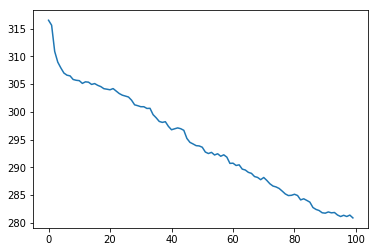

In [14]:
plt.plot(EE)